# 误差反向传播法

计算图（Computation Graph） 是深度学习中的一个重要概念，用于表示计算过程。它是一个有向无环图（Directed Acyclic Graph, DAG），其中每个节点表示一个操作或变量，每条边表示操作之间的依赖关系。

<span style="color: red;">**计算图的组成**</span>
1. 节点（Nodes）：
* 变量节点：表示输入数据、权重、偏置等变量。
* 操作节点：表示数学运算（如加法、乘法、激活函数等）。

2. 边（Edges）：
* 表示数据在节点之间的流动和依赖关系。

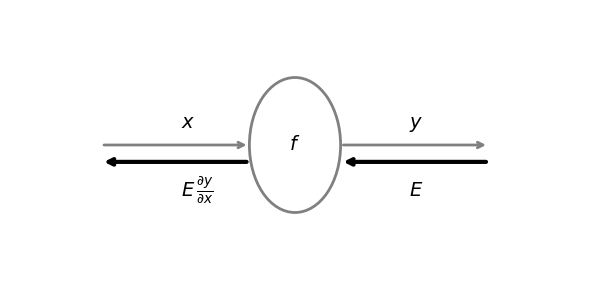

In [271]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

def draw_computational_graph():
    fig, ax = plt.subplots(figsize=(6, 3))
    
    # 1) 画出代表 f 的圆形节点
    circle_f = Circle((2, 0), radius=0.4, edgecolor='gray', facecolor='white', 
                      linewidth=2, zorder=3)
    ax.add_patch(circle_f)
    ax.text(2, 0, r'$f$', ha='center', va='center', fontsize=14, zorder=4)
    
    # 2) 画 x -> f 的灰色箭头
    #    起点 (0.3, 0), 终点 (1.6, 0) 即从左到圆心左侧
    ax.annotate(
        '', 
        xy=(1.6, 0), 
        xytext=(0.3, 0),
        arrowprops=dict(arrowstyle="->", color='gray', linewidth=2)
    )
    # 在箭头左端上方标注 x
    ax.text(1, 0.1, r'$x$', fontsize=14, color='black')
    
    # 3) 画 f -> y 的灰色箭头
    #    起点 (2.4, 0), 终点 (3.7, 0) 即从圆心右侧到右端
    ax.annotate(
        '',
        xy=(3.7, 0),
        xytext=(2.4, 0),
        arrowprops=dict(arrowstyle="->", color='gray', linewidth=2)
    )
    # 在箭头右端上方标注 y
    ax.text(3, 0.1, r'$y$', fontsize=14, color='black')
    
    # 4) 画右侧反向传播的 E（粗黑箭头）
    #    从 (3.7, -0.1) 指向 (2.4, -0.1)
    ax.annotate(
        '',
        xy=(2.4, -0.1),
        xytext=(3.7, -0.1),
        arrowprops=dict(arrowstyle="->", color='black', linewidth=3)
    )
    # 在靠右处标注 E
    ax.text(3, -0.3, r'$E$', fontsize=14, color='black')
    
    # 5) 画左侧反向传播的 E * dy/dx（粗黑箭头）
    #    从 (1.6, -0.1) 指向 (0.3, -0.1)
    ax.annotate(
        '',
        xy=(0.3, -0.1),
        xytext=(1.6, -0.1),
        arrowprops=dict(arrowstyle="->", color='black', linewidth=3)
    )
    # 在靠左处标注 E * dy/dx
    ax.text(1, -0.3, r'$E\,\frac{\partial y}{\partial x}$', fontsize=14, color='black')
    
    # 设置坐标范围并去掉坐标轴
    ax.set_xlim(-0.5, 4.5)
    ax.set_ylim(-0.8, 0.8)
    ax.axis('off')
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":

反向传播的计算顺序是，将信号 $E$ 乘以节点的局部导数$\frac{\partial y}{\partial x}$，然后将结果传递给下一个节点。这里所说的局部导数是指正向传播中$y = f(x)$的导数，也就是$y$关于$x$的导数（$\frac{\partial y}{\partial x}$）。比如，假设$y = f(x) = x^2$ ， 则局部导数为 $\frac{\partial y}{\partial x} = 2x$ 。把这个局部导数乘以上游传过来的值（本例中为E）， 然后传递给前面的节点。

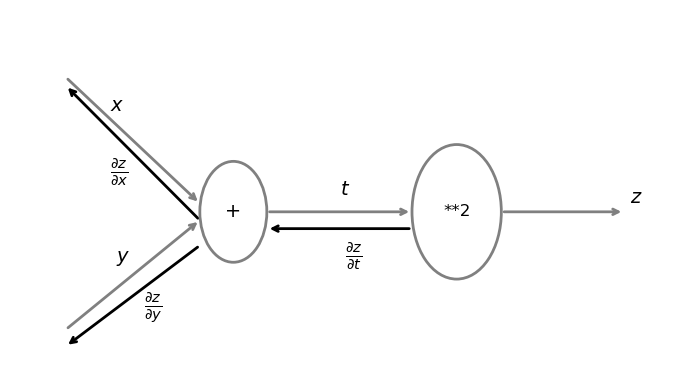

In [106]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

def draw_computational_graph():
    fig, ax = plt.subplots(figsize=(7, 4))
    
    # + 节点中心坐标
    plus_center = (2, 1)
    # **2 节点中心坐标
    pow_center  = (4, 1)
    
    # 1) 画加法节点
    circle_plus = Circle(plus_center, radius=0.3, edgecolor='gray', 
                         facecolor='white', linewidth=2, zorder=3)
    ax.add_patch(circle_plus)
    ax.text(*plus_center, '+', fontsize=14, ha='center', va='center', zorder=4)
    
    # 2) 画平方节点
    circle_pow = Circle(pow_center, radius=0.4, edgecolor='gray', 
                        facecolor='white', linewidth=2, zorder=3)
    ax.add_patch(circle_pow)
    ax.text(pow_center[0], pow_center[1], '**2', fontsize=12, 
            ha='center', va='center', zorder=4)
    
    # 3) 画输入 x、y 以及箭头（灰色）
    #    这里将 x 置于 (0.5, 1.8)，y 置于 (1.0, 0.3) 作为示例
    
    # x -> plus
    ax.annotate(
        '', 
        xy=(plus_center[0] - 0.3, plus_center[1] + 0.05),  # 箭头终点（稍微左一点）
        xytext=(0.5, 1.8),                                 # 箭头起点
        arrowprops=dict(arrowstyle="->", color='gray', linewidth=2),
        zorder=2
    )
    ax.text(0.9, 1.6, r'$x$', fontsize=14, color='black')
    
    # y -> plus
    ax.annotate(
        '',
        xy=(plus_center[0] - 0.3, plus_center[1] - 0.05),  # 箭头终点（稍微左一点）
        xytext=(0.5, 0.3),                                # 箭头起点
        arrowprops=dict(arrowstyle="->", color='gray', linewidth=2),
        zorder=2
    )
    ax.text(0.95, 0.7, r'$y$', fontsize=14, color='black')
    
    # 4) 画 t -> **2 箭头（灰色）
    ax.annotate(
        '',
        xy=(pow_center[0] - 0.4, pow_center[1]),  # 到平方节点左侧
        xytext=(plus_center[0] + 0.3, plus_center[1]),  # 从加法节点右侧
        arrowprops=dict(arrowstyle="->", color='gray', linewidth=2),
        zorder=2
    )
    ax.text((plus_center[0]+pow_center[0])/2, plus_center[1]+0.1, r'$t$', 
            fontsize=14, color='black', ha='center')
    
    # 5) 画 **2 -> z 箭头（灰色）
    ax.annotate(
        '',
        xy=(5.5, 1),            # 箭头终点 (右侧)
        xytext=(pow_center[0] + 0.4, pow_center[1]),  # 从平方节点右侧
        arrowprops=dict(arrowstyle="->", color='gray', linewidth=2),
        zorder=2
    )
    ax.text(5.55, 1.05, r'$z$', fontsize=14, color='black')
    
    # 6) 标注偏导（黑色粗箭头或文本）
    #    以下仅示例几条主要的偏导标注，可根据需要加更多
    
    # 偏导 z 对 x
    ax.annotate(
        '',
        xy=(0.5, 1.75),   # 终点
        xytext=(plus_center[0] - 0.3, plus_center[1] - 0.05),  # 起点
        arrowprops=dict(arrowstyle="->", color='black', linewidth=2),
        zorder=2
    )
    ax.text(0.9, 1.2, r'$\frac{\partial z}{\partial x}$', fontsize=15, color='black')
    
    # 偏导 z 对 y
    ax.annotate(
        '',
        xy=(0.5, 0.2),
        xytext=(plus_center[0] - 0.3, plus_center[1] - 0.2),
        arrowprops=dict(arrowstyle="->", color='black', linewidth=2),
        zorder=2
    )
    ax.text(1.2, 0.4, r'$\frac{\partial z}{\partial y}$', fontsize=15, color='black')
    
    # 偏导 z 对 t
    ax.annotate(
        '',
        xy=(plus_center[0] + 0.3, plus_center[1] - 0.1),
        xytext=(pow_center[0] - 0.4, pow_center[1] - 0.1),
        arrowprops=dict(arrowstyle="->", color='black', linewidth=2),
        zorder=2
    )
    ax.text((plus_center[0]+pow_center[0])/2, plus_center[1] - 0.3, 
            r'$\frac{\partial z}{\partial t}$', fontsize=15, color='black')
    
    # 这里仅示例几处偏导标注，实际可根据你那张图的布局添加更多文字或箭头
    
    # 设置图形范围、去掉坐标轴
    ax.set_xlim(0, 6)
    ax.set_ylim(0, 2.2)
    ax.axis('off')
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    draw_computational_graph()

$$
\begin{gathered}
z=t^2 \\
t=x+y
\end{gathered}
$$

$$
\frac{\partial z}{\partial x}=\frac{\partial z}{\partial z} \frac{\partial z}{\partial t} \frac{\partial t}{\partial x}=\frac{\partial z}{\partial t} \frac{\partial t}{\partial x}
$$

$$
\frac{\partial z}{\partial x}=\frac{\partial z}{\partial t} \frac{\partial t}{\partial x}=2 t \cdot 1=2(x+y)
$$

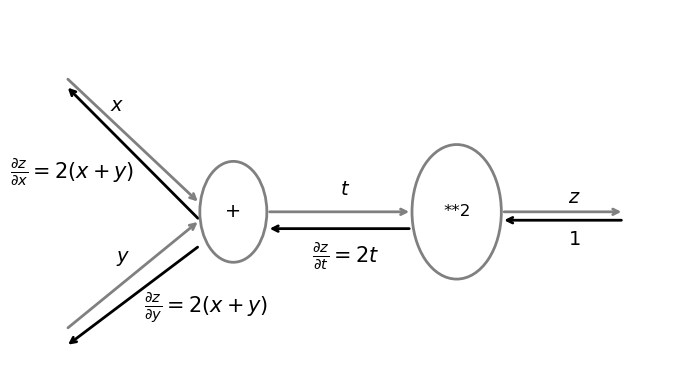

In [148]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

def draw_computational_graph():
    fig, ax = plt.subplots(figsize=(7, 4))
    
    # + 节点中心坐标
    plus_center = (2, 1)
    # **2 节点中心坐标
    pow_center  = (4, 1)
    
    # 1) 画加法节点
    circle_plus = Circle(plus_center, radius=0.3, edgecolor='gray', 
                         facecolor='white', linewidth=2, zorder=3)
    ax.add_patch(circle_plus)
    ax.text(*plus_center, '+', fontsize=14, ha='center', va='center', zorder=4)
    
    # 2) 画平方节点
    circle_pow = Circle(pow_center, radius=0.4, edgecolor='gray', 
                        facecolor='white', linewidth=2, zorder=3)
    ax.add_patch(circle_pow)
    ax.text(pow_center[0], pow_center[1], '**2', fontsize=12, 
            ha='center', va='center', zorder=4)
    
    # 3) 画输入 x、y 以及箭头（灰色）
    #    这里将 x 置于 (0.5, 1.8)，y 置于 (1.0, 0.3) 作为示例
    
    # x -> plus
    ax.annotate(
        '', 
        xy=(plus_center[0] - 0.3, plus_center[1] + 0.05),  # 箭头终点（稍微左一点）
        xytext=(0.5, 1.8),                                 # 箭头起点
        arrowprops=dict(arrowstyle="->", color='gray', linewidth=2),
        zorder=2
    )
    ax.text(0.9, 1.6, r'$x$', fontsize=14, color='black')
    
    # y -> plus
    ax.annotate(
        '',
        xy=(plus_center[0] - 0.3, plus_center[1] - 0.05),  # 箭头终点（稍微左一点）
        xytext=(0.5, 0.3),                                # 箭头起点
        arrowprops=dict(arrowstyle="->", color='gray', linewidth=2),
        zorder=2
    )
    ax.text(0.95, 0.7, r'$y$', fontsize=14, color='black')
    
    # 4) 画 t -> **2 箭头（灰色）
    ax.annotate(
        '',
        xy=(pow_center[0] - 0.4, pow_center[1]),  # 到平方节点左侧
        xytext=(plus_center[0] + 0.3, plus_center[1]),  # 从加法节点右侧
        arrowprops=dict(arrowstyle="->", color='gray', linewidth=2),
        zorder=2
    )
    ax.text((plus_center[0]+pow_center[0])/2, plus_center[1]+0.1, r'$t$', 
            fontsize=14, color='black', ha='center')
    
    # 5) 画 **2 -> z 箭头（灰色）
    ax.annotate(
        '',
        xy=(5.5, 1),            # 箭头终点 (右侧)
        xytext=(pow_center[0] + 0.4, pow_center[1]),  # 从平方节点右侧
        arrowprops=dict(arrowstyle="->", color='gray', linewidth=2),
        zorder=2
    )
    ax.text(5.0, 1.05, r'$z$', fontsize=14, color='black')
    
    # 6) 标注偏导（黑色粗箭头或文本）
    #    以下仅示例几条主要的偏导标注，可根据需要加更多
    
    # 偏导 z 对 x
    ax.annotate(
        '',
        xy=(0.5, 1.75),   # 终点
        xytext=(plus_center[0] - 0.3, plus_center[1] - 0.05),  # 起点
        arrowprops=dict(arrowstyle="->", color='black', linewidth=2),
        zorder=2
    )
    ax.text(0
            , 1.2, r'$\frac{\partial z}{\partial x} = 2(x + y)$', fontsize=15, color='black')
    
    # 偏导 z 对 y
    ax.annotate(
        '',
        xy=(0.5, 0.2),
        xytext=(plus_center[0] - 0.3, plus_center[1] - 0.2),
        arrowprops=dict(arrowstyle="->", color='black', linewidth=2),
        zorder=2
    )
    ax.text(1.2, 0.4, r'$\frac{\partial z}{\partial y} = 2(x + y)$', fontsize=15, color='black')
    
    # 偏导 z 对 t
    ax.annotate(
        '',
        xy=(plus_center[0] + 0.3, plus_center[1] - 0.1),
        xytext=(pow_center[0] - 0.4, pow_center[1] - 0.1),
        arrowprops=dict(arrowstyle="->", color='black', linewidth=2),
        zorder=2
    )
    ax.text((plus_center[0]+pow_center[0])/2 - 0.3, plus_center[1] - 0.3, 
            r'$\frac{\partial z}{\partial t} = 2t$', fontsize=15, color='black')

    ax.annotate(
        '',
        xy=(pow_center[0] + 0.4, pow_center[1] - 0.05),            # 箭头终点 (右侧)
        xytext=(5.5, 0.95),  # 从平方节点右侧
        arrowprops=dict(arrowstyle="->", color='black', linewidth=2),
        zorder=2
    )
    ax.text(5, 0.8, r'$1$', fontsize=14, color='black')
    
    # 设置图形范围、去掉坐标轴
    ax.set_xlim(0, 6)
    ax.set_ylim(0, 2.2)
    ax.axis('off')
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    draw_computational_graph()

## 反向传播

### 加法节点的反向传播
首先来考虑加法节点的反向传播。这里以$z = x + y$为对象，观察它的反向传播。$z = x + y$的导数可由下式（解析性地）计算出来。

$$
\begin{aligned}
& \frac{\partial z}{\partial x}=1 \\
& \frac{\partial z}{\partial y}=1
\end{aligned}
$$

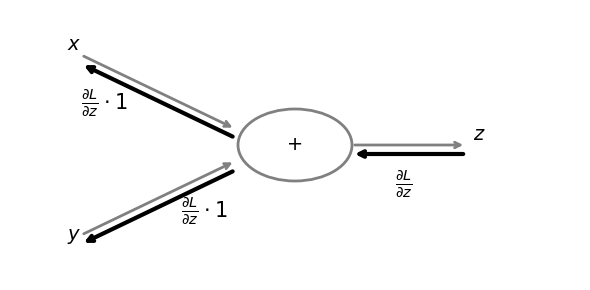

In [179]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

def draw_add_node():
    fig, ax = plt.subplots(figsize=(6, 3))
    
    # 加法节点中心坐标
    plus_center = (2, 0)
    
    # 1) 画加法节点（圆圈内标记“+”）
    circle_plus = Circle(plus_center, radius=0.4, edgecolor='gray', 
                         facecolor='white', linewidth=2, zorder=3)
    ax.add_patch(circle_plus)
    ax.text(*plus_center, '+', fontsize=14, ha='center', va='center', zorder=4)
    
    # 2) 画输入 x、y（灰色箭头）
    #    假设 x 在左上角，y 在左下角
    
    # x -> plus
    ax.annotate(
        '',
        xy=(plus_center[0] - 0.42, plus_center[1] + 0.18),  # 箭头终点(接近节点左侧)
        xytext=(0.5, 1.0),                                 # 箭头起点(可自行调节)
        arrowprops=dict(arrowstyle="->", color='gray', linewidth=2),
    )
    # 在 x 箭头附近标注 x
    ax.text(0.4, 1.05, r'$x$', fontsize=14, color='black')
    
    # y -> plus
    ax.annotate(
        '',
        xy=(plus_center[0] - 0.42, plus_center[1] - 0.18),  # 箭头终点(接近节点左下)
        xytext=(0.5, -1.0),                                # 箭头起点(可自行调节)
        arrowprops=dict(arrowstyle="->", color='gray', linewidth=2),
    )
    # 在 y 箭头附近标注 y
    ax.text(0.4, -1.05, r'$y$', fontsize=14, color='black')
    
    # 3) 画加法节点输出 z（灰色箭头）
    ax.annotate(
        '',
        xy=(3.2, 0),                       # 箭头终点(右侧)
        xytext=(plus_center[0] + 0.4, 0),  # 箭头起点(节点右侧)
        arrowprops=dict(arrowstyle="->", color='gray', linewidth=2),
    )
    # 在箭头右端标注 z
    ax.text(3.25, 0.05, r'$z$', fontsize=14, color='black')
    
    # 4) 画反向传播的梯度 dL/dz (粗黑箭头)
    #    从右向左回传至加法节点
    ax.annotate(
        '',
        xy=(plus_center[0] + 0.4, -0.1),  # 到节点右侧
        xytext=(3.2, -0.1),                # 从输出 z 处
        arrowprops=dict(arrowstyle="->", color='black', linewidth=3),
    )
    # 在箭头右边标注 dL/dz
    ax.text(2.7, -0.5, r'$\frac{\partial L}{\partial z}$', fontsize=15, color='black')
    
    # 5) 画分到 x 分支的梯度 (dL/dz * 1)
    #    假设从节点到左上侧(与 x 同一路径反向)
    ax.annotate(
        '',
        xy=(0.5, 0.9),    # 终点(与x输入箭头类似,可适当错开)
        xytext=(plus_center[0] - 0.42, plus_center[1] + 0.08),
        arrowprops=dict(arrowstyle="->", color='black', linewidth=3),
    )
    # 在靠近 x 输入处标注 dL/dz * 1
    ax.text(0.5, 0.4, r'$\frac{\partial L}{\partial z}\cdot 1$', fontsize=15, color='black')
    
    # 6) 画分到 y 分支的梯度 (dL/dz * 1)
    ax.annotate(
        '',
        xy=(0.5, -1.1),
        xytext=(plus_center[0] - 0.42, plus_center[1] - 0.28),
        arrowprops=dict(arrowstyle="->", color='black', linewidth=3),
    )
    # 在靠近 y 输入处标注 dL/dz * 1
    ax.text(1.2, -0.8, r'$\frac{\partial L}{\partial z}\cdot 1$', fontsize=15, color='black')
    
    # 7) 设置坐标范围、去掉坐标轴
    ax.set_xlim(0, 4)
    ax.set_ylim(-1.5, 1.5)
    ax.axis('off')
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    draw_add_node()

假设有一个简单的网络：

$$
z = a + b \\
L = f(z)
$$

其中  $f$  是某个损失函数。

正向传播：
1. 计算  $z = a + b$
2. 计算  $L = f(z)$ 

反向传播：
1. 计算  $\frac{\partial L}{\partial z} = f{\prime}(z)$
2. 由于  $\frac{\partial z}{\partial a} = 1  和  \frac{\partial z}{\partial b} = 1$ ，因此：

$$
\frac{\partial L}{\partial a} = \frac{\partial L}{\partial z} \cdot 1 = f{\prime}(z) \\
$$
$$
\frac{\partial L}{\partial b} = \frac{\partial L}{\partial z} \cdot 1 = f{\prime}(z)
$$

总结

加法节点在反向传播中的计算图相对简单，因为每个输入的梯度都是相同的（导数为1）。这使得加法操作在梯度传递过程中不会改变梯度的大小，仅仅是将梯度传递到每个输入。这一特性在构建复杂的神经网络时非常有用，因为它简化了梯度计算和传递的过程。

### 乘法节点的反向传播

乘法节点的反向传播。这里我们考虑$z = xy$。

$$
\begin{aligned}
& \frac{\partial z}{\partial x}=y \\
& \frac{\partial z}{\partial y}=x
\end{aligned}
$$

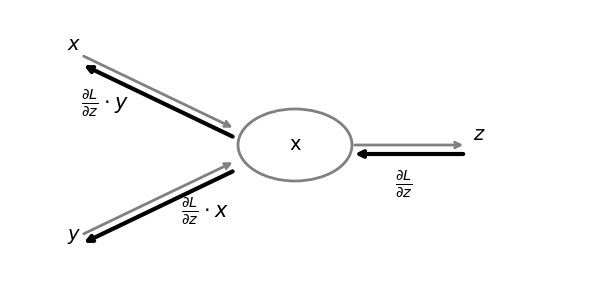

In [195]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

def draw_add_node():
    fig, ax = plt.subplots(figsize=(6, 3))
    
    # 加法节点中心坐标
    plus_center = (2, 0)
    
    # 1) 画加法节点（圆圈内标记“+”）
    circle_plus = Circle(plus_center, radius=0.4, edgecolor='gray', 
                         facecolor='white', linewidth=2, zorder=3)
    ax.add_patch(circle_plus)
    ax.text(*plus_center, 'x', fontsize=14, ha='center', va='center', zorder=4)
    
    # 2) 画输入 x、y（灰色箭头）
    #    假设 x 在左上角，y 在左下角
    
    # x -> plus
    ax.annotate(
        '',
        xy=(plus_center[0] - 0.42, plus_center[1] + 0.18),  # 箭头终点(接近节点左侧)
        xytext=(0.5, 1.0),                                 # 箭头起点(可自行调节)
        arrowprops=dict(arrowstyle="->", color='gray', linewidth=2),
    )
    # 在 x 箭头附近标注 x
    ax.text(0.4, 1.05, r'$x$', fontsize=14, color='black')
    
    # y -> plus
    ax.annotate(
        '',
        xy=(plus_center[0] - 0.42, plus_center[1] - 0.18),  # 箭头终点(接近节点左下)
        xytext=(0.5, -1.0),                                # 箭头起点(可自行调节)
        arrowprops=dict(arrowstyle="->", color='gray', linewidth=2),
    )
    # 在 y 箭头附近标注 y
    ax.text(0.4, -1.05, r'$y$', fontsize=14, color='black')
    
    # 3) 画加法节点输出 z（灰色箭头）
    ax.annotate(
        '',
        xy=(3.2, 0),                       # 箭头终点(右侧)
        xytext=(plus_center[0] + 0.4, 0),  # 箭头起点(节点右侧)
        arrowprops=dict(arrowstyle="->", color='gray', linewidth=2),
    )
    # 在箭头右端标注 z
    ax.text(3.25, 0.05, r'$z$', fontsize=14, color='black')
    
    # 4) 画反向传播的梯度 dL/dz (粗黑箭头)
    #    从右向左回传至加法节点
    ax.annotate(
        '',
        xy=(plus_center[0] + 0.4, -0.1),  # 到节点右侧
        xytext=(3.2, -0.1),                # 从输出 z 处
        arrowprops=dict(arrowstyle="->", color='black', linewidth=3),
    )
    # 在箭头右边标注 dL/dz
    ax.text(2.7, -0.5, r'$\frac{\partial L}{\partial z}$', fontsize=15, color='black')
    
    # 5) 画分到 x 分支的梯度 (dL/dz * 1)
    #    假设从节点到左上侧(与 x 同一路径反向)
    ax.annotate(
        '',
        xy=(0.5, 0.9),    # 终点(与x输入箭头类似,可适当错开)
        xytext=(plus_center[0] - 0.42, plus_center[1] + 0.08),
        arrowprops=dict(arrowstyle="->", color='black', linewidth=3),
    )
    # 在靠近 x 输入处标注 dL/dz * y
    ax.text(0.5, 0.4, r'$\frac{\partial L}{\partial z}\cdot y$', fontsize=15, color='black')
    
    # 6) 画分到 y 分支的梯度 (dL/dz * 1)
    ax.annotate(
        '',
        xy=(0.5, -1.1),
        xytext=(plus_center[0] - 0.42, plus_center[1] - 0.28),
        arrowprops=dict(arrowstyle="->", color='black', linewidth=3),
    )
    # 在靠近 y 输入处标注 dL/dz * x
    ax.text(1.2, -0.8, r'$\frac{\partial L}{\partial z}\cdot x$', fontsize=15, color='black')
    
    # 7) 设置坐标范围、去掉坐标轴
    ax.set_xlim(0, 4)
    ax.set_ylim(-1.5, 1.5)
    ax.axis('off')
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    draw_add_node()

假设乘法节点接受  $n$  个输入：

$$
z = x_1 \times x_2 \times \dots \times x_n = \prod_{i=1}^{n} x_i
$$

根据链式法则，损失函数  L  对输入  x_i  的梯度可以表示为：

$$
\frac{\partial L}{\partial x_i} = \frac{\partial L}{\partial z} \cdot \frac{\partial z}{\partial x_i}
$$

计算  $\frac{\partial z}{\partial x_i} $

由于  $z = \prod_{j=1}^{n} x_j$ ，对  $x_i$  的偏导数为：

$$
\frac{\partial z}{\partial x_i} = \prod_{\substack{j=1 \\ j \neq i}}^{n} x_j = \frac{z}{x_i}
$$

将  $\frac{\partial z}{\partial x_i}$  代入链式法则：

$$
\frac{\partial L}{\partial x_i} = \frac{\partial L}{\partial z} \cdot \frac{z}{x_i} = \frac{\partial L}{\partial z} \cdot \prod_{\substack{j=1 \\ j \neq i}}^{n} x_j
$$

或者，利用  $z = \prod_{j=1}^{n} x_j$ ，可以简化为：

$$
\frac{\partial L}{\partial x_i} = \frac{\partial L}{\partial z} \cdot \frac{z}{x_i}
$$

In [201]:
# 定义乘法节点
class MultiplicationNode:
    def __init__(self, num_inputs):
        self.num_inputs = num_inputs
        self.inputs = [0.0] * num_inputs
        self.output = 0.0
        self.grad_output = 0.0
        self.grad_inputs = [0.0] * num_inputs

    def forward(self, inputs):
        assert len(inputs) == self.num_inputs, "输入数量不匹配"
        self.inputs = inputs
        self.output = 1.0
        for x in inputs:
            self.output *= x
        return self.output

    def backward(self, grad_output):
        self.grad_output = grad_output
        self.grad_inputs = []
        for i in range(self.num_inputs):
            if self.inputs[i] != 0:
                grad = grad_output * (self.output / self.inputs[i])
            else:
                grad = 0.0
            self.grad_inputs.append(grad)
        return self.grad_inputs

# 定义损失函数 L = z
def loss_function(z):
    return z

# 导数 dL/dz = 1
def loss_derivative(z):
    return 1.0

# 示例使用
if __name__ == "__main__":
    # 创建一个有 3 个输入的乘法节点
    num_inputs = 3
    mul_node = MultiplicationNode(num_inputs)

    # 定义输入
    inputs = [2.0, 3.0, 4.0]
    print(f"输入: {inputs}")

    # 前向传播
    z = mul_node.forward(inputs)
    print(f"乘法节点输出 z: {z}")

    # 计算损失
    L = loss_function(z)
    print(f"损失 L: {L}")

    # 反向传播
    dL_dz = loss_derivative(z)
    print(f"dL/dz: {dL_dz}")

    grad_inputs = mul_node.backward(dL_dz)
    for i, grad in enumerate(grad_inputs):
        print(f"dL/dx{i+1}: {grad}")

输入: [2.0, 3.0, 4.0]
乘法节点输出 z: 24.0
损失 L: 24.0
dL/dz: 1.0
dL/dx1: 12.0
dL/dx2: 8.0
dL/dx3: 6.0


## 激活函数层的实现
### ReLU层
激活函数ReLU（Rectified Linear Unit）由下式表示
$$
\begin{aligned}
&y= \begin{cases}x & (x>0) \\ 0 & (x \leqslant 0)\end{cases}\\
\end{aligned}
$$

求出y关于x的导数

$$
\begin{aligned}
&\frac{\partial y}{\partial x}= \begin{cases}1 & (x>0) \\ 0 & (x \leqslant 0)\end{cases}
\end{aligned}
$$

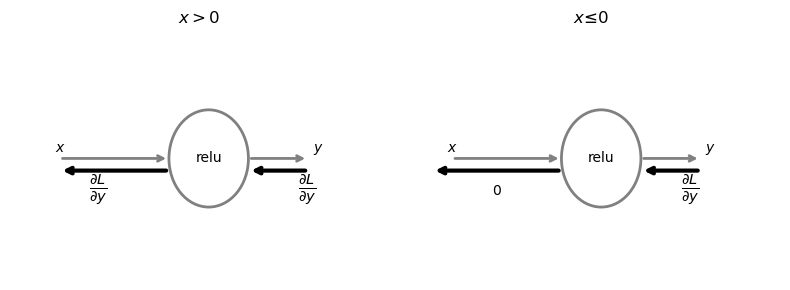

In [266]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

def draw_relu_diagram():
    fig, axes = plt.subplots(1, 2, figsize=(8, 3))

    ##################################################
    # 左图：x > 0
    ##################################################
    ax_left = axes[0]
    # 注意标题中用数学环境 $x > 0$
    ax_left.set_title(r'$x > 0$', fontsize=12, pad=10)

    center_left = (2, 0)  # ReLU 节点的中心坐标

    # 1) 画 ReLU 圆圈
    circle_relu_left = Circle(
        center_left, radius=0.4, edgecolor='gray',
        facecolor='white', linewidth=2
    )
    ax_left.add_patch(circle_relu_left)
    ax_left.text(*center_left, 'relu', ha='center', va='center', fontsize=10)

    # 2) 正向传播箭头: x -> ReLU
    ax_left.annotate(
        '', xy=(1.6, 0), xytext=(0.5, 0),
        arrowprops=dict(arrowstyle='->', color='gray', linewidth=2),
    )
    ax_left.text(0.45, 0.05, r'$x$', fontsize=10, color='black')

    # 3) 正向传播箭头: ReLU -> y
    ax_left.annotate(
        '', xy=(3.0, 0), xytext=(2.4, 0),
        arrowprops=dict(arrowstyle='->', color='gray', linewidth=2),
    )
    ax_left.text(3.05, 0.05, r'$y$', fontsize=10, color='black')

    # 4) 反向传播箭头: y -> ReLU （∂L/∂y）
    ax_left.annotate(
        '', xy=(3.0, -0.1), xytext=(2.4, -0.1),
        arrowprops=dict(arrowstyle='<-', color='black', linewidth=3),
    )
    ax_left.text(2.9, -0.3, r'$\frac{\partial L}{\partial y}$', fontsize=15, color='black')

    # 5) 反向传播箭头: ReLU -> x （∂L/∂y）
    ax_left.annotate(
        '', xy=(1.6, -0.1), xytext=(0.5, -0.1),
        arrowprops=dict(arrowstyle='<-', color='black', linewidth=3),
    )
    ax_left.text(0.8, -0.3, r'$\frac{\partial L}{\partial y}$', fontsize=15, color='black')

    ax_left.set_xlim(0, 3.8)
    ax_left.set_ylim(-1, 1)
    ax_left.axis('off')

    ##################################################
    # 右图：x <= 0
    ##################################################
    ax_right = axes[1]
    # 这里将 \le 放入数学环境，避免解析出错
    ax_right.set_title(r'$x ≤ 0$', fontsize=12, pad=10)

    center_right = (2, 0)

    # 1) 画 ReLU 圆圈
    circle_relu_right = Circle(
        center_right, radius=0.4, edgecolor='gray',
        facecolor='white', linewidth=2
    )
    ax_right.add_patch(circle_relu_right)
    ax_right.text(*center_right, 'relu', ha='center', va='center', fontsize=10)

    # 2) 正向传播箭头: x -> ReLU
    ax_right.annotate(
        '', xy=(1.6, 0), xytext=(0.5, 0),
        arrowprops=dict(arrowstyle='->', color='gray', linewidth=2),
    )
    ax_right.text(0.45, 0.05, r'$x$', fontsize=10, color='black')

    # 3) 正向传播箭头: ReLU -> y
    ax_right.annotate(
        '', xy=(3.0, 0), xytext=(2.4, 0),
        arrowprops=dict(arrowstyle='->', color='gray', linewidth=2),
    )
    ax_right.text(3.05, 0.05, r'$y$', fontsize=10, color='black')

    # 4) 反向传播箭头: y -> ReLU （∂L/∂y）
    ax_right.annotate(
        '', xy=(3.0, -0.1), xytext=(2.4, -0.1),
        arrowprops=dict(arrowstyle='<-', color='black', linewidth=3),
    )
    ax_right.text(2.8, -0.3, r'$\frac{\partial L}{\partial y}$', fontsize=15, color='black')

    # 5) 反向传播箭头: ReLU -> x 为 0
    #    这里仅做一个短箭头示意，或可直接标注“0”
    ax_right.annotate(
        '', xy=(1.6, -0.1), xytext=(0.3, -0.1),
        arrowprops=dict(arrowstyle='<-', color='black', linewidth=3),
    )
    ax_right.text(0.9, -0.3, r'$0$', fontsize=10, color='black')

    ax_right.set_xlim(0, 3.8)
    ax_right.set_ylim(-1, 1)
    ax_right.axis('off')

    plt.tight_layout()
    plt.show()


draw_relu_diagram()

**ReLU层的计算图**

In [206]:
# 定义乘法节点
class MultiplicationNode:
    def __init__(self, num_inputs):
        self.num_inputs = num_inputs
        self.inputs = [0.0] * num_inputs
        self.output = 0.0
        self.grad_output = 0.0
        self.grad_inputs = [0.0] * num_inputs

    def forward(self, inputs):
        assert len(inputs) == self.num_inputs, "输入数量不匹配"
        self.inputs = inputs
        self.output = 1.0
        for x in inputs:
            self.output *= x
        return self.output

    def backward(self, grad_output):
        self.grad_output = grad_output
        self.grad_inputs = []
        for i in range(self.num_inputs):
            if self.inputs[i] != 0:
                grad = grad_output * (self.output / self.inputs[i])
            else:
                grad = 0.0
            self.grad_inputs.append(grad)
        return self.grad_inputs

# 定义 ReLU 层
class ReLULayer:
    def __init__(self):
        self.mask = None

    def forward(self, inputs):
        if isinstance(inputs, list):
            self.mask = [x > 0 for x in inputs]
            return [x if x > 0 else 0.0 for x in inputs]
        else:
            self.mask = inputs > 0
            return inputs if inputs > 0 else 0.0

    def backward(self, grad_output):
        if isinstance(grad_output, list):
            return [go if m else 0.0 for go, m in zip(grad_output, self.mask)]
        else:
            return grad_output if self.mask else 0.0

# 定义损失函数和其导数
def loss_function(outputs):
    """
    计算损失 L = sum(y_i^2)
    :param outputs: 输出列表
    :return: 标量损失
    """
    return sum([y ** 2 for y in outputs])

def loss_derivative(outputs):
    """
    计算损失函数对输出的导数 dL/dy_i = 2 * y_i
    :param outputs: 输出列表
    :return: 导数列表
    """
    return [2 * y for y in outputs]

# 示例使用
if __name__ == "__main__":
    # 创建乘法节点和 ReLU 层
    num_inputs = 3
    mul_node = MultiplicationNode(num_inputs)
    relu = ReLULayer()

    # 测试用例 1：ReLU 输出为 0
    print("=== 测试用例 1：ReLU 输出为 0 ===")
    inputs1 = [2.0, -3.0, 4.0]
    print(f"输入: {inputs1}")

    # 前向传播
    z1 = mul_node.forward(inputs1)
    print(f"乘法节点输出 z: {z1}")

    # 应用 ReLU
    y1 = relu.forward(z1)
    print(f"ReLU 输出 y: {y1}")

    # 计算损失
    L1 = loss_function([y1])
    print(f"损失 L: {L1}")

    # 反向传播
    dL_dy1 = loss_derivative([y1])  # [2 * y]
    print(f"dL/dy: {dL_dy1}")

    # 反向传播 through ReLU
    dL_dz1 = relu.backward(dL_dy1[0])
    print(f"dL/dz: {dL_dz1}")

    # 反向传播 through Multiplication Node
    dL_dx1 = mul_node.backward(dL_dz1)
    for i, grad in enumerate(dL_dx1):
        print(f"dL/dx{i+1}: {grad}")

    # 测试用例 2：ReLU 输出为正值
    print("\n=== 测试用例 2：ReLU 输出为正值 ===")
    inputs2 = [1.0, 3.0, 2.0]
    print(f"输入: {inputs2}")

    # 前向传播
    z2 = mul_node.forward(inputs2)
    print(f"乘法节点输出 z: {z2}")

    # 应用 ReLU
    y2 = relu.forward(z2)
    print(f"ReLU 输出 y: {y2}")

    # 计算损失
    L2 = loss_function([y2])
    print(f"损失 L: {L2}")

    # 反向传播
    dL_dy2 = loss_derivative([y2])  # [2 * y]
    print(f"dL/dy: {dL_dy2}")

    # 反向传播 through ReLU
    dL_dz2 = relu.backward(dL_dy2[0])
    print(f"dL/dz: {dL_dz2}")

    # 反向传播 through Multiplication Node
    dL_dx2 = mul_node.backward(dL_dz2)
    for i, grad in enumerate(dL_dx2):
        print(f"dL/dx{i+1}: {grad}")

=== 测试用例 1：ReLU 输出为 0 ===
输入: [2.0, -3.0, 4.0]
乘法节点输出 z: -24.0
ReLU 输出 y: 0.0
损失 L: 0.0
dL/dy: [0.0]
dL/dz: 0.0
dL/dx1: -0.0
dL/dx2: 0.0
dL/dx3: -0.0

=== 测试用例 2：ReLU 输出为正值 ===
输入: [1.0, 3.0, 2.0]
乘法节点输出 z: 6.0
ReLU 输出 y: 6.0
损失 L: 36.0
dL/dy: [12.0]
dL/dz: 12.0
dL/dx1: 72.0
dL/dx2: 24.0
dL/dx3: 36.0


ReLU层的作用就像电路中的开关一样。正向传播时，有电流通过的话，就将开关设为ON；没有电流通过的话，就将开关设为OFF。 反向传播时，开关为ON的话，电流会直接通过；开关为OFF的话，则不会有电流通过。

### Sigmoid层
sigmoid函数

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

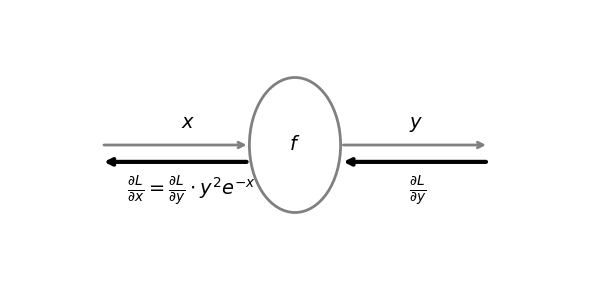

In [283]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

def draw_computational_graph():
    fig, ax = plt.subplots(figsize=(6, 3))
    
    # 1) 画出代表 f 的圆形节点
    circle_f = Circle((2, 0), radius=0.4, edgecolor='gray', facecolor='white', 
                      linewidth=2, zorder=3)
    ax.add_patch(circle_f)
    ax.text(2, 0, r'$f$', ha='center', va='center', fontsize=14, zorder=4)
    
    # 2) 画 x -> f 的灰色箭头
    #    起点 (0.3, 0), 终点 (1.6, 0) 即从左到圆心左侧
    ax.annotate(
        '', 
        xy=(1.6, 0), 
        xytext=(0.3, 0),
        arrowprops=dict(arrowstyle="->", color='gray', linewidth=2)
    )
    # 在箭头左端上方标注 x
    ax.text(1, 0.1, r'$x$', fontsize=14, color='black')
    
    # 3) 画 f -> y 的灰色箭头
    #    起点 (2.4, 0), 终点 (3.7, 0) 即从圆心右侧到右端
    ax.annotate(
        '',
        xy=(3.7, 0),
        xytext=(2.4, 0),
        arrowprops=dict(arrowstyle="->", color='gray', linewidth=2)
    )
    # 在箭头右端上方标注 y
    ax.text(3, 0.1, r'$y$', fontsize=14, color='black')
    
    # 4) 画右侧反向传播的 E（粗黑箭头）
    #    从 (3.7, -0.1) 指向 (2.4, -0.1)
    ax.annotate(
        '',
        xy=(2.4, -0.1),
        xytext=(3.7, -0.1),
        arrowprops=dict(arrowstyle="->", color='black', linewidth=3)
    )
    # 在靠右处标注 E
    ax.text(3, -0.3, r'$\frac{\partial L}{\partial y}$', fontsize=14, color='black')
    
    # 5) 画左侧反向传播的 E * dy/dx（粗黑箭头）
    #    从 (1.6, -0.1) 指向 (0.3, -0.1)
    ax.annotate(
        '',
        xy=(0.3, -0.1),
        xytext=(1.6, -0.1),
        arrowprops=dict(arrowstyle="->", color='black', linewidth=3)
    )
    # 在靠左处标注 E * dy/dx
    ax.text(0.5, -0.3, r'$\,\frac{\partial L}{\partial x} = \frac{\partial L}{\partial y} \cdot y^2 e^{-x}$', fontsize=14, color='black')
    


    # 设置坐标范围并去掉坐标轴
    ax.set_xlim(-0.5, 4.5)
    ax.set_ylim(-0.8, 0.8)
    ax.axis('off')
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    draw_computational_graph()

对  $\sigma(x)$  求导：

$$
\frac{d\sigma(x)}{dx} = \sigma(x)(1 - \sigma(x))
$$

推导过程：

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

对  $x$  求导：

$$
\frac{d\sigma(x)}{dx} = \frac{d}{dx} \left( 1 + e^{-x} \right)^{-1}
= -\left( 1 + e^{-x} \right)^{-2} \cdot \frac{d}{dx}(1 + e^{-x})
= \frac{e^{-x}}{(1 + e^{-x})^2}
$$

因为：

$$
\sigma(x) = \frac{1}{1 + e^{-x}} \quad \text{和} \quad 1 - \sigma(x) = \frac{e^{-x}}{1 + e^{-x}}
$$

所以：

$$
\frac{d\sigma(x)}{dx} = \sigma(x)(1 - \sigma(x))
$$

用  $y$  重写导数

注意到：

$$
y = \frac{1}{1 + e^{-x}}, \quad 1 - y = \frac{e^{-x}}{1 + e^{-x}}
$$

因此：

$$
\frac{dy}{dx} = y \cdot (1 - y) = y \cdot \frac{e^{-x}}{1 + e^{-x}} = y^2 e^{-x}
$$


In [295]:
import numpy as np

# Sigmoid 函数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Sigmoid 的反向传播
def sigmoid_backward(dL_dy, y):
    """
    dL_dy: 从后续层传递来的梯度
    y: Sigmoid 层的输出
    """
    return dL_dy * y * (1 - y)

# 示例
x = np.array([0.5, 0.0, -0.5])  # 输入
y = sigmoid(x)                  # 前向传播输出
dL_dy = np.array([0.1, 0.2, 0.3])  # 假设的上游梯度

# 反向传播
dL_dx = sigmoid_backward(dL_dy, y)
print("Gradient w.r.t. input:", dL_dx)

Gradient w.r.t. input: [0.02350037 0.05       0.07050111]


### 上游梯度和下游梯度
在深度学习中的反向传播中，上游梯度和下游梯度的概念通常用来描述在计算图中的梯度传递过程。

<span style="color: red;">**上游梯度**</span>
* 定义：上游梯度是从后续层（靠近损失函数的一侧）传递到当前节点的梯度。
* 来源：上游梯度来自后续节点，是后续节点的输出梯度。
* 在链式法则中，它对应的是  $\frac{\partial L}{\partial y}$ ，即损失对当前层输出的偏导数。

举例

在 Sigmoid 层中：

$$
\frac{\partial L}{\partial x} = \frac{\partial L}{\partial y} \cdot \frac{\partial y}{\partial x}
$$

* 上游梯度是  $\frac{\partial L}{\partial y}$ ，它是从下一个层（后续层）传递来的。
* Sigmoid 自己的局部梯度是  $\frac{\partial y}{\partial x}$ 。

<span style="color: red;">**下游梯度**</span>
* 定义：下游梯度是当前节点根据自己的梯度计算规则，传递给前面节点（靠近输入一侧）的梯度。
* 输出：下游梯度是损失函数对当前层输入的偏导数，它会继续传递到前面层。
* 在链式法则中，它对应的是  $\frac{\partial L}{\partial x}$ 。

举例

在 Sigmoid 层中：

$$
\frac{\partial L}{\partial x} = \frac{\partial L}{\partial y} \cdot \frac{\partial y}{\partial x}
$$

* 下游梯度是  $\frac{\partial L}{\partial x}$ ，它会传递到前面的网络部分。

上游梯度通过当前层的局部梯度计算出下游梯度。

具体流程：
1. 获取上游梯度：从后续层传递来的梯度（如 $\frac{\partial L}{\partial y}$）。
2. 计算局部梯度：当前层对输入的偏导数（如 Sigmoid 的 $\frac{\partial y}{\partial x} = y(1-y)$）。
3. 传递下游梯度：结合链式法则计算  $\frac{\partial L}{\partial x}$  并传递给前一层。

前向传播：

$$
x \xrightarrow{\text{层1}} y \xrightarrow{\text{层2}} z \xrightarrow{\text{层3}} L
$$

反向传播：

$$
\frac{\partial L}{\partial L} \rightarrow \frac{\partial L}{\partial z} \rightarrow \frac{\partial L}{\partial y} \rightarrow \frac{\partial L}{\partial x}
$$

* 从后向前，梯度逐层流动，每一层会将自己的梯度计算为“下游梯度”，并作为“上游梯度”传递给前一层。

<span style="color: red;">**举例：全连接层中的梯度传播**</span>

假设一个全连接层，输入为  $x$ ，输出为  $y$ ：

$$
y = Wx + b
$$

反向传播
1. 上游梯度：从后续层传递来的  $\frac{\partial L}{\partial y}$ 。
2. 局部梯度：
    * 对  $x$  的梯度：$\frac{\partial y}{\partial x} = W$。
    * 对  $W$  的梯度：$\frac{\partial y}{\partial W} = x$。
    * 对  $b$  的梯度：$\frac{\partial y}{\partial b} = 1$。
3. 下游梯度：
    * 对  $x ：\frac{\partial L}{\partial x} = \frac{\partial L}{\partial y} \cdot W$。
    * 对  $W ：\frac{\partial L}{\partial W} = x \cdot \frac{\partial L}{\partial y}$。
    * 对  $b ：\frac{\partial L}{\partial b} = \frac{\partial L}{\partial y}$。